The highest occupancy rates are in the following neighbourhoods.
The highest earners are in the following neighbourhoods
Is there a correlation? Are high occupancies the highest earners

Which neighbourhoods indicate highest occupancy? 

Considerations
Distance from CBD?
Listing 
areas 
occupancy
Average occupancy for that neighbou
Top 10
Bottom 10
Bar chart – top 10 bottom10
Average stay overall

#######DO correlation coefficient with other question's data

In [148]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dta
#For correlation coefficient
import scipy.stats as st

In [149]:
#Read in csv file

CSV_path = "../clean_data_rs/airbnbFINAL_JS.csv"

airbnbOccStart = pd.read_csv(CSV_path)
airbnbOccStart

,id,host_id,host_name,host_is_superhost,host_total_listings_count,street,neighbourhood_cleansed,city,state,zipcode,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,distance_from_cbd
0,12936,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,15,94,9,10,94,9,9,9,0.15,5.205174
1,47100,212071,Loren,t,4,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,176,98,10,10,98,10,10,10,1.75,3.649571
2,50492,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,44,97,10,10,97,10,9,10,0.60,5.437003
3,51592,190879,Michelle,t,1,"Melbourne, VIC, Australia",Melbourne,Melbourne,Vic,3000,...,196,99,10,9,99,10,10,10,2.07,0.072335
4,66754,50121,Frank & Vince,t,17,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,43,95,9,10,95,10,10,9,0.46,2.794548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,30410904,127327853,Nathan,f,1,"Melbourne, VIC, Australia",Melbourne,Melbourne,Vic,3000,...,2,100,10,10,100,10,10,10,2.00,0.700146
9885,30468406,30322920,Robyn,f,1,"Brunswick West, VIC, Australia",Moreland,Brunswick West,Vic,3055,...,1,0,0,0,0,0,0,0,1.00,5.893982
9886,30470482,36410227,Sabrina,f,276,"Port Melbourne, Australia",Port Phillip,Port Melbourne,Vic,3207,...,1,0,0,0,0,0,0,0,1.00,3.780995
9887,30483362,154023219,Aishah,f,1,"Preston, VIC, Australia",Darebin,Preston,Vic,3072,...,1,0,0,0,0,0,0,0,1.00,8.746854


In [150]:
#List of columns
airbnbOccStart.columns

Index(['id', 'host_id', 'host_name', 'host_is_superhost',
       'host_total_listings_count', 'street', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'latitude', 'longitude', 'property_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'distance_from_cbd'],
      dtype='object')

In [151]:
# Checking the number of records.
    #number of unique neighbourhoods

print("There are " + str(len(airbnbOccStart)) + " records in the dataframe")
    

print("There are " + str(len(airbnbOccStart["neighbourhood_cleansed"].unique())) +  " unique neighbourhoods in the dataframe")

There are 9889 records in the dataframe
There are 14 unique neighbourhoods in the dataframe


In [152]:
#determine if blank fields and datatypes
airbnbOccStart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9889 entries, 0 to 9888
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           9889 non-null   int64  
 1   host_id                      9889 non-null   int64  
 2   host_name                    9889 non-null   object 
 3   host_is_superhost            9889 non-null   object 
 4   host_total_listings_count    9889 non-null   int64  
 5   street                       9889 non-null   object 
 6   neighbourhood_cleansed       9889 non-null   object 
 7   city                         9889 non-null   object 
 8   state                        9889 non-null   object 
 9   zipcode                      9889 non-null   object 
 10  latitude                     9889 non-null   float64
 11  longitude                    9889 non-null   float64
 12  property_type                9889 non-null   object 
 13  accommodates      

### Neighbourhood Summary Table
Based on average reviews per month

In [153]:

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
    #of the rating for each Neighbourhood

# This method produces everything in a single groupby function
airbnbOccNeighGroup = airbnbOccStart.groupby(["neighbourhood_cleansed"])
airbnbOccsummary = airbnbOccNeighGroup["reviews_per_month"].agg(["mean", "median", "var", "std", "sem"])
airbnbOccsummarysort = airbnbOccsummary.sort_values(by="mean", ascending=False) 

airbnb_Occupancy_Rate_Summary = airbnbOccsummarysort.rename(columns={
    "mean":"Mean reviews per month",
    "median":"Median reviews per month",
    "var":"Variance reviews per month",
    "std":"Standard Deviation reviews per month",
    "sem":"SEM reviews per month"
})

airbnb_Occupancy_Rate_Summary


,Mean reviews per month,Median reviews per month,Variance reviews per month,Standard Deviation reviews per month,SEM reviews per month
neighbourhood_cleansed,,,,,
Melbourne,2.393344,1.900,4.112318,2.027885,0.030126
Brimbank,2.228000,2.410,0.093620,0.305974,0.136836
Moonee Valley,1.718417,1.145,2.872543,1.694858,0.154719
Yarra,1.514548,0.990,2.540386,1.593859,0.047000
Banyule,1.498462,1.030,1.984363,1.408674,0.174725
Maribyrnong,1.492618,1.130,1.897380,1.377454,0.099669
Boroondara,1.447131,0.955,2.465908,1.570321,0.100529
Port Phillip,1.327065,0.780,2.201566,1.483767,0.036018
Moreland,1.304704,0.700,2.357639,1.535461,0.079610


#### Neighbourhood Summary Table Observation
Stand outs are Melbourne and Brimbank with a similar mean
However Melbourne's median  differs from its mean and the variance is  large compared to the Brimbank.
Brimbank's standard deviation is also substantially lower than Melbourne.
Due to Melbourne's unpredictability, and the rest of the neighbourhoods being somewhat consistent Mean, it is benefical to break it down into cities (suburbs)

### City Summary Table Top 10
Based on average reviews per month

In [154]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM 
    #of the rating for each city

# This method produces everything in a single groupby function
airbnbOccCityGroup = airbnbOccStart.groupby(["city"])
airbnbOccCitysummary = airbnbOccCityGroup["reviews_per_month"].agg(["mean", "median", "var", "std", "sem"])

airbnbOccCitysummary = airbnbOccCitysummary.rename(columns={
    "mean":"Mean reviews per month",
    "median":"Median reviews per month",
    "var":"Variance reviews per month",
    "std":"Standard Deviation reviews per month",
    "sem":"SEM reviews per month"
})

airbnbOccCitysummarysorttop = airbnbOccCitysummary.sort_values(by = "Mean reviews per month", ascending=False)


airbnb_Occupancy_City_Rate_Summary_TopTen = airbnbOccCitysummarysorttop.head(10)

airbnb_Occupancy_City_Rate_Summary_TopTen


,Mean reviews per month,Median reviews per month,Variance reviews per month,Standard Deviation reviews per month,SEM reviews per month
city,,,,,
Niddrie,8.520000,8.520,NaN,NaN,NaN
Brooklyn,7.830000,7.830,NaN,NaN,NaN
Essendon North,3.020000,3.020,NaN,NaN,NaN
Strathmore,2.933333,3.630,4.965033,2.228235,1.286472
Melbourne,2.567119,2.070,4.232003,2.057183,0.038677
Docklands,2.378560,1.605,5.252441,2.291820,0.117260
Maribyrnong,2.320000,2.255,2.748680,1.657914,0.325144
West Melbourne,2.308889,2.000,2.989962,1.729151,0.144096
Heidelberg Heights,2.301250,2.235,4.226927,2.055949,0.726888


### City Summary Table Bottom 10
Based on average reviews per month

In [155]:
airbnbOccCitysummarysortbottom = airbnbOccCitysummary.sort_values(by = "Mean reviews per month", ascending=True)

airbnb_Occupancy_City_Rate_Summary_BottomTen = airbnbOccCitysummarysortbottom.head(10)

airbnb_Occupancy_City_Rate_Summary_BottomTen

,Mean reviews per month,Median reviews per month,Variance reviews per month,Standard Deviation reviews per month,SEM reviews per month
city,,,,,
Port Phillip City,0.090000,0.09,NaN,NaN,NaN
Preston West,0.100000,0.10,NaN,NaN,NaN
City of Port Phillip,0.220000,0.22,NaN,NaN,NaN
Essendon West,0.240000,0.24,NaN,NaN,NaN
Gardenvale,0.337500,0.29,0.091292,0.302145,0.151073
Moreland City,0.420000,0.42,NaN,NaN,NaN
Ashburton,0.450000,0.45,0.217800,0.466690,0.330000
Altona North,0.497143,0.32,0.180857,0.425273,0.160738
South Kingsville,0.581667,0.38,0.332817,0.576903,0.235520


In [156]:
#checking which neighbourhoods for the top and bottom 10 cities

# iterating the columns 
for row in airbnb_Occupancy_City_Rate_Summary_TopTen.index: 
     
    neighbourhood = airbnbOccStart[airbnbOccStart.city == row]["neighbourhood_cleansed"]
       
    print("The top suburb of " + row + " is in the neighbourhood of " + neighbourhood.iloc[0])

    
    
print("")
# iterating the columns 
for row in airbnb_Occupancy_City_Rate_Summary_BottomTen.index: 
     
    neighbourhood = airbnbOccStart[airbnbOccStart.city == row]["neighbourhood_cleansed"]
       
    print("The bottom suburb of " + row + " is in the neighbourhood of " + neighbourhood.iloc[0])

The top suburb of Niddrie is in the neighbourhood of Moonee Valley
The top suburb of Brooklyn is in the neighbourhood of Hobsons Bay
The top suburb of Essendon North is in the neighbourhood of Moonee Valley
The top suburb of Strathmore is in the neighbourhood of Moonee Valley
The top suburb of Melbourne is in the neighbourhood of Melbourne
The top suburb of Docklands is in the neighbourhood of Melbourne
The top suburb of Maribyrnong is in the neighbourhood of Maribyrnong
The top suburb of West Melbourne is in the neighbourhood of Melbourne
The top suburb of Heidelberg Heights is in the neighbourhood of Banyule
The top suburb of Moonee Ponds is in the neighbourhood of Moonee Valley

The bottom suburb of Port Phillip City is in the neighbourhood of Port Phillip
The bottom suburb of Preston West is in the neighbourhood of Darebin
The bottom suburb of City of Port Phillip is in the neighbourhood of Port Phillip
The bottom suburb of Essendon West is in the neighbourhood of Moonee Valley
The

#### City Summary Table Observation
Where as the summary table indicated Melbourne and Brimbank as the top 2 neighbourhoods, by ranking occupancy we can see the following:
* Melbourne has 3 suburbs in the top ten suburbs
* But Moonee Valley also has 4 suburbs.




### Bar plot of total number of reviews

In [172]:
#To get a sense ofhow this occupany rate might look for a a year, extrapolate monthly reviews over 12 months

#Top cities
BarchartseriesTop = airbnb_Occupancy_City_Rate_Summary_TopTen["Mean reviews per month"] * 12

#Create Y axis values
topy = pd.Series(BarchartseriesTop).values
print(topy)

#Create x 
topx = BarchartseriesTop.index
print(topx)



[102.24        93.96        36.24        35.2         30.80542948
  28.54272251  27.84        27.70666667  27.615       27.51272727]
Index(['Niddrie', 'Brooklyn', 'Essendon North', 'Strathmore', 'Melbourne',
       'Docklands', 'Maribyrnong', 'West Melbourne', 'Heidelberg Heights',
       'Moonee Ponds'],
      dtype='object', name='city')


In [200]:
#Bottom cities
BarchartseriesBottom = airbnb_Occupancy_City_Rate_Summary_BottomTen["Mean reviews per month"] * 12
BarchartseriesBottomSort = BarchartseriesBottom.sort_values(ascending=False)
BarchartseriesBottomSort

#Create Y axis values
bottomy = pd.Series(BarchartseriesBottomSort).values
print(bottomy)

#Create x 
bottomx = BarchartseriesBottomSort.index
print(bottomx)

[7.56363636 6.98       5.96571429 5.4        5.04       4.05
 2.88       2.64       1.2        1.08      ]
Index(['Middle Park', 'South Kingsville', 'Altona North', 'Ashburton',
       'Moreland City', 'Gardenvale', 'Essendon West', 'City of Port Phillip',
       'Preston West', 'Port Phillip City'],
      dtype='object', name='city')


In [201]:
# Generate a bar plot showing the total number of ratings for each city
    #using pandas. 
#regimenmice = mouseregimengroup["Mouse ID"].nunique()

#Y axis = number of sum of rating for each city
#regimenY = regimenmice.values.tolist()

#airbnbcityY = airbnb_Occupancy_City_Rate_Summary_TopTen["2.567119"]
#airbnbcityY


#X azis = city


#airbnbcitylist = airbnbOccStart["city"].nunique()
#airbnbcityX = airbnbcitylist.index.tolist()

#regimenmice.plot.bar(figsize=(12,6), width=.5, rot=0, title='Number of mice per treatment regimen\n Pandas')
#plt.xlabel('Drug Regimen',fontdict={'fontsize':12})
#plt.ylabel("Number of mice", fontdict={'fontsize':12})

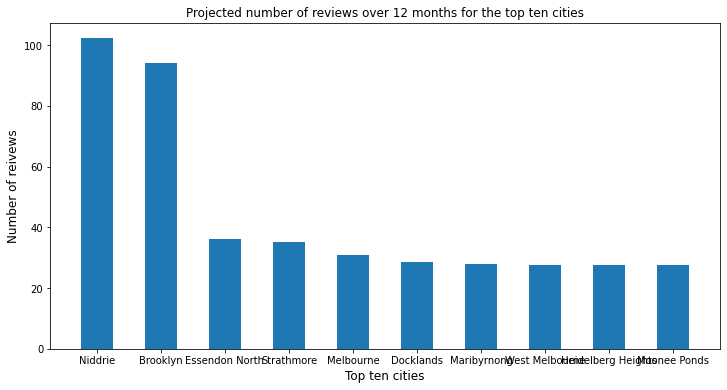

In [202]:
#TOP bar chart

plt.figure(figsize=(12,6))
plt.bar(topx, topy, width=.5,)
plt.title('Projected number of reviews over 12 months for the top ten cities')
plt.xlabel('Top ten cities',fontdict={'fontsize':12})
plt.ylabel('Number of reivews', fontdict={'fontsize':12})

plt.show()

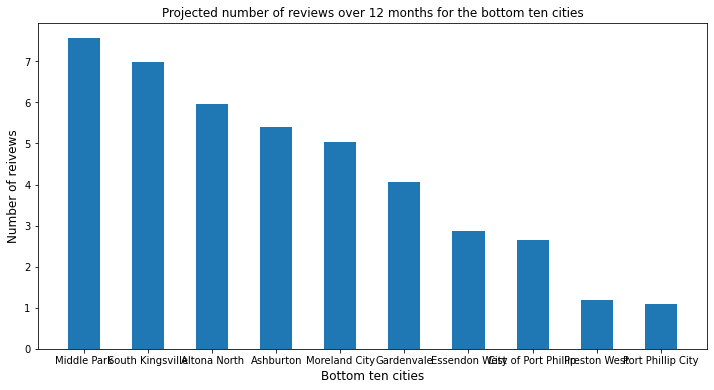

In [203]:
#BOTTOM bar chart

plt.figure(figsize=(12,6))
plt.bar(bottomx, bottomy, width=.5,)
plt.title('Projected number of reviews over 12 months for the bottom ten cities')
plt.xlabel('Bottom ten cities',fontdict={'fontsize':12})
plt.ylabel('Number of reivews', fontdict={'fontsize':12})

plt.show()

<BarContainer object of 10 artists>

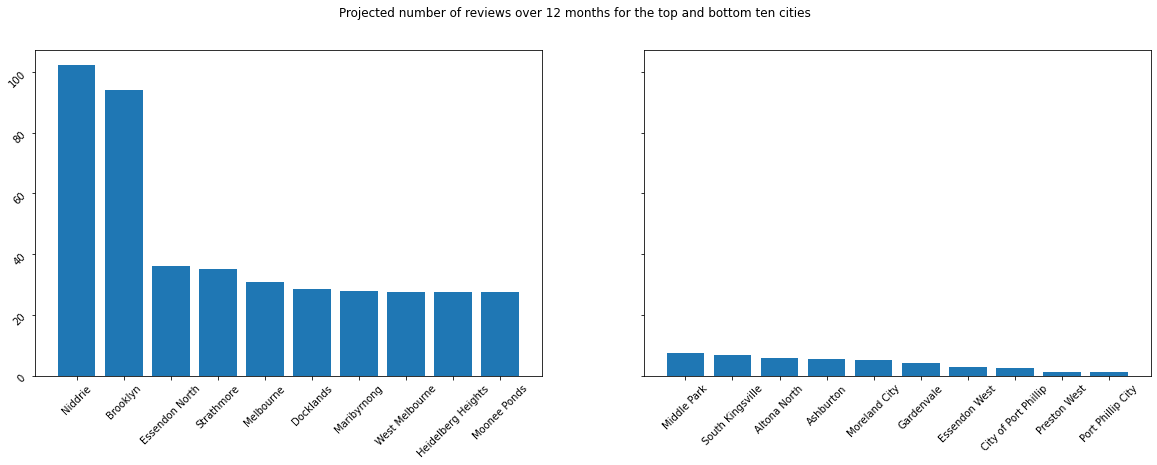

In [204]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6), sharey=True)


fig.suptitle('Projected number of reviews over 12 months for the top and bottom ten cities')


ax1.bar(topx, topy)

for ax in fig.axes:
    ax.tick_params(labelrotation=45)


ax2.bar(bottomx, bottomy)

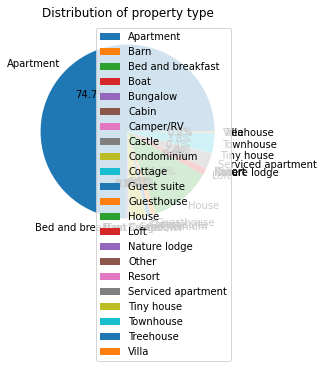

In [213]:

#Generate a pie plot to see the break up of accomodation types
airbnbpropertygroup = airbnbOccStart.groupby(["property_type"])
airbnbpropertycount = airbnbpropertygroup["id"].nunique()
#labels = ["Female", "Male"]

airbnbpropertycount.plot.pie(title='Distribution of property type', autopct="%1.1f%%")
plt.ylabel('')
plt.legend()

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

topfourtreatmentslist = list(lastimetopfour['Drug Regimen'].unique())
topfourtreatmentslist

In [ ]:
# Create empty list to fill with tumor vol data (for plotting)

mylist = []

In [ ]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

#https://stackoverflow.com/questions/46411031/create-subsets-in-a-loop-according-to-a-column-values-in-pandas-dataframe
    
for regimen in topfourtreatmentslist:
    regimenvolumedate = lastimetopfour.loc[lastimetopfour["Drug Regimen"] == regimen,"Tumor Volume (mm3)"]
    
    #https://www.geeksforgeeks.org/python-ways-to-create-a-dictionary-of-lists/
            
    mouseid = regimenvolumedate.index.tolist()
    idvalues = regimenvolumedate.values.tolist()
    
    mylist.append(idvalues)
    
    #Define the quartiles
    mousequartile = regimenvolumedate.quantile([.25,.5,.75])
    
    #Store quartile, iqr and lower and upper bound ranges
    mouselowerq = mousequartile[0.25]
    mouseupperq = mousequartile[0.75]
    mouseiqr = mouseupperq-mouselowerq
    mouselower_bound = mouselowerq - (1.5*mouseiqr)
    mouseupper_bound = mouseupperq + (1.5*mouseiqr)
    
    print(regimen)
    print(f" Lower quartile of final tumor volume is: {mouselowerq.round(2)} (mm3)")
    print(f" Upper quartile of final tumor volume is: {mouseupperq.round(2)} (mm3)")
    print(f" Interquartile range of final tumor volume is: {mouseiqr.round(2)} (mm3)")
    print(f" Median range of final tumor volume is: {mousequartile[.5].round(2)} (mm3)")
    print(f" Values below {mouselower_bound.round(2)} (mm3) could be outliers.")
    print(f" Values above {mouseupper_bound.round(2)} (mm3) could be outliers.\n")

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax = plt.subplots()
fig.suptitle('Final tumor volume for top four treatment regimens\n Potential outlier is red triangle', fontsize=12)
ax.boxplot(mylist, sym="rv")
ax.set_xticklabels(topfourtreatmentslist)
ax.set_xlabel('Top four treatment regimen', fontsize=12)
ax.set_ylabel('Final tumor volume', fontsize=12)
plt.show()

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
    
    #Start with clean data and isolate the Capomulin data
CapomulinFullData = mouseclean.loc[mouseclean["Drug Regimen"]=="Capomulin",:]


    #Create a series for the average tumor volume for each mouse in Capomulin
mouseIDgroup = CapomulinFullData.groupby(["Mouse ID"])
mousetumoraverage = mouseIDgroup["Tumor Volume (mm3)"].mean()

    #get a series of mouse weights
mousetumorweight = mouseIDgroup["Weight (g)"].unique()

    #Needed to reconvert weight valules to strings
mousetumorweight = mousetumorweight.str[0]

    #Check data
print(mousetumorweight, mousetumoraverage)

In [ ]:
#Scatterplot
    #x-axis weight
    #y-axis tumor volume

    #To make a neat x axis labels
xweight = np.arange(min(mousetumorweight), max(mousetumorweight)+1, 1)

    #Make points larger and transparent to show overlapping points for mice of 17g
plt.scatter(mousetumorweight, mousetumoraverage, s=50, alpha=0.65)
plt.title('Mouse weight vs average tumor volume\n (Capomulin)')
plt.xticks(xweight)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Size')
plt.show()

#make larger and dots transparent so you can see overlapping dots for with 17g

In [ ]:
#neighbourhood versus average ratings per month
#group 
neighbourhood_v_monthlyratings = 